In [1]:

def d3_armor_reduction(df):
    df_c = df.copy()
    df_c['d3_res_reduction'] = (df_c['armor'] / (df_c['armor'] + df_c['lvl'] * 5)) * 100
    df_c['d3_res_dmg_taken'] = df_c['dpt100'] / 100 * (100 - df_c['d3_res_reduction'])
    return df_c


def lol_res_reduction(df):
    df_c = df.copy()
    lol_multi_cond = [df_c['armor'] < 0, df_c['armor'] >= 0]
    lol_neg_def = 2 - (100 / (100 - df_c['armor']))
    lol_pos_def = 100 / (100 + df_c['armor'])

    df_c['dmg_multi_lol'] = np.select(lol_multi_cond, [lol_neg_def, lol_pos_def])
    df_c['lol_dmg_taken'] = df_c['dmg_multi_lol'] * df_c['dpt100']
    return df_c


def avg_dmg_redu_dodge(df):
    df_c = df.copy()
    df_c['lol_dmg_redu_dodge'] = df_c['lol_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    df_c['d3_dmg_redu_dodge'] = df_c['d3_res_dmg_taken'] * (1 - (df_c['dodge'] / 100))
    return df_c

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from all_more_base_stats import *
f_results = fight_results[fight_results.columns[-(len(cl_df_list)*2):]]


('dex_class', {'starting_pts': 26, 'growth_pts': 13})
('str_class', {'starting_pts': 26, 'growth_pts': 12})
('int_class', {'starting_pts': 23, 'growth_pts': 10})


In [3]:
f_results.apply(lambda row: [(unit.name, round(unit.hp / unit.max_hp * 100, 2)) for unit in row])

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
0,"(str_cl, 61.25)","(str_cl, 54.37)","(int_cl, 26.15)","(str_cl, 15.0)","(str_cl, 100.0)","(int_cl, 46.15)"
1,"(str_cl, 24.89)","(str_cl, 100.0)","(int_cl, 18.79)","(str_cl, 22.67)","(str_cl, 5.33)","(int_cl, 43.64)"
2,"(str_cl, 37.93)","(str_cl, 48.28)","(int_cl, 14.0)","(dex_cl, 30.43)","(str_cl, 100.0)","(int_cl, 42.5)"
3,"(dex_cl, 3.57)","(str_cl, 47.04)","(dex_cl, 15.0)","(str_cl, 65.35)","(int_cl, 17.02)","(int_cl, 42.13)"
4,"(str_cl, 37.14)","(str_cl, 29.05)","(dex_cl, 14.85)","(str_cl, 33.33)","(int_cl, 16.3)","(int_cl, 41.85)"
5,"(str_cl, 37.53)","(str_cl, 28.04)","(dex_cl, 100.0)","(str_cl, 36.49)","(str_cl, 17.94)","(int_cl, 41.97)"
6,"(str_cl, 58.18)","(str_cl, 46.0)","(dex_cl, 14.65)","(str_cl, 69.27)","(str_cl, 20.73)","(int_cl, 42.06)"
7,"(str_cl, 58.37)","(int_cl, 31.2)","(int_cl, 5.6)","(dex_cl, 100.0)","(str_cl, 23.25)","(int_cl, 42.67)"
8,"(dex_cl, 4.15)","(int_cl, 30.24)","(dex_cl, 100.0)","(dex_cl, 39.81)","(str_cl, 25.74)","(int_cl, 43.17)"
9,"(str_cl, 37.58)","(str_cl, 45.37)","(dex_cl, 100.0)","(dex_cl, 41.21)","(str_cl, 100.0)","(dex_cl, 100.0)"


In [4]:
get_unit_attribute(f_results, 'name').describe()

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
count,30,30,30,30,30,30
unique,2,2,2,2,2,2
top,dex_cl,str_cl,dex_cl,str_cl,str_cl,dex_cl
freq,15,25,24,16,26,18


In [5]:
# approx turns it took to win
turns_to_win = (get_unit_attribute(f_results, 'ct_to_win') / 100)[1:]  # clock ticks it took to win / 100 ticks (for a turn)
turns_to_win

,dex_v_str_d3,int_v_str_d3,int_v_dex_d3,dex_v_str_lol,int_v_str_lol,int_v_dex_lol
1,3.12,2.08,2.18,2.08,2.08,1.09
2,3.09,2.06,2.16,1.84,2.06,1.08
3,3.52,2.04,1.76,2.04,1.08,1.08
4,3.03,2.02,2.55,3.03,2.14,1.07
5,3.00,2.00,0.81,2.00,2.00,1.07
6,2.94,1.96,1.58,0.98,1.96,1.06
7,2.91,2.12,2.12,1.52,1.94,1.06
8,3.65,2.12,0.73,1.46,1.92,1.06
9,2.85,1.90,0.71,1.42,1.90,0.71
10,2.82,1.88,0.69,1.38,1.88,1.05


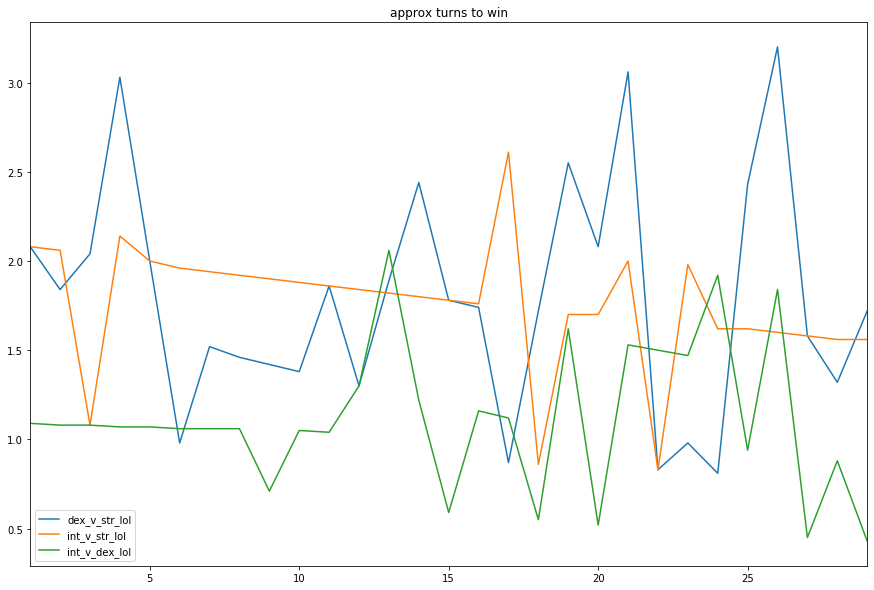

In [6]:
lol_cols = [col for col in turns_to_win if col[-3:] == 'lol']
turns_to_win[lol_cols].plot(title='approx turns to win' ,figsize=[15,10])

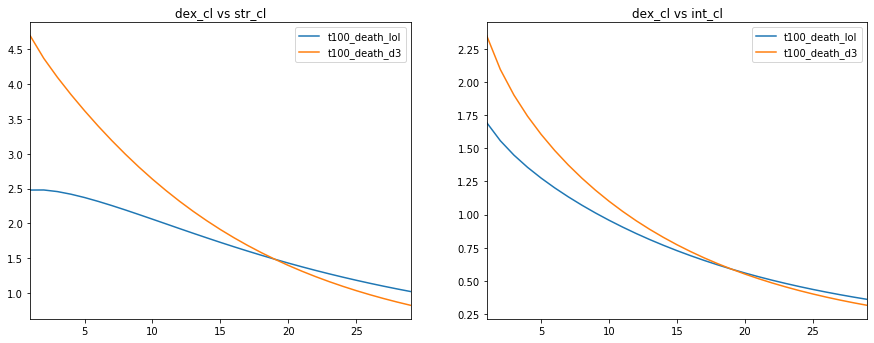

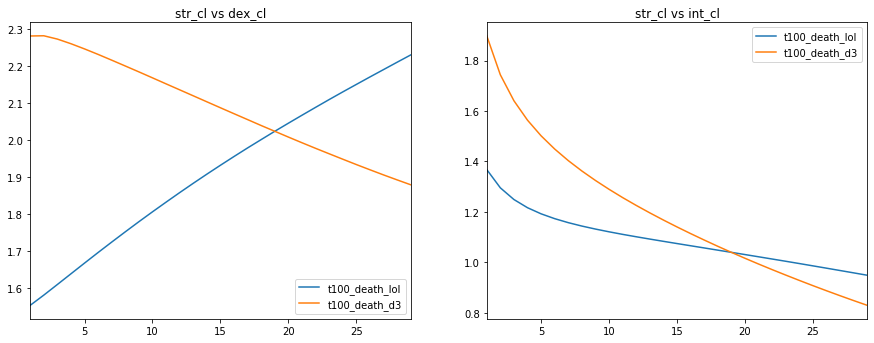

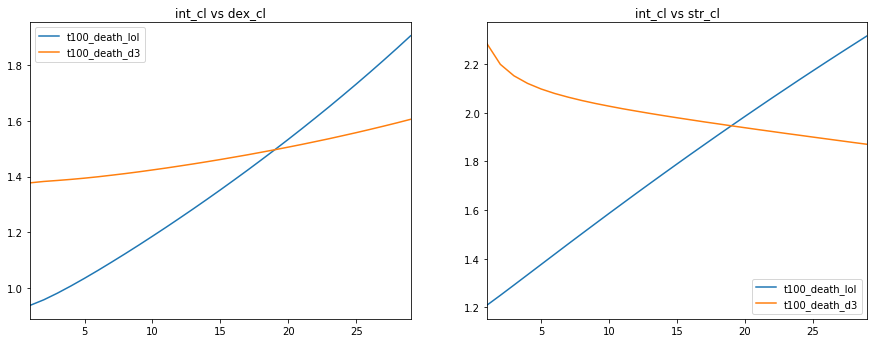

In [7]:
# how many 100clock ticks does it take to kill the defender
for i,attacker in enumerate(cl_df_list):
    cl_df_l_copy = cl_df_list.copy()
    cl_df_l_copy.pop(i)
    
    fig = plt.figure(figsize=[15, 12])
    for n, defender in enumerate(cl_df_l_copy):
        ax = fig.add_subplot(221+n)
        test_df = pd.concat([attacker[['dpt100', 'lvl']], defender[['dodge', 'd3_res_reduction', 'dmg_multi_lol', 'hp', 'armor']]], axis=1)
        
        test_df = d3_armor_reduction(test_df)
        test_df = lol_res_reduction(test_df)
        test_df = avg_dmg_redu_dodge(test_df)
        test_df['t100_death_lol'] = test_df['hp'] / test_df['lol_dmg_redu_dodge']
        test_df['t100_death_d3'] = test_df['hp'] / test_df['d3_dmg_redu_dodge']
        test_df[['t100_death_lol', 't100_death_d3']].iloc[1:].plot(title=attacker.name+' vs '+defender.name, ax=ax)

In [8]:
compare(all_cl_df, ['speed', 'ticks_to_turn'])

,speed_dex,speed_str,speed_int,ticks_to_turn_dex,ticks_to_turn_str,ticks_to_turn_int
0,10.06,9.50,9.20,99.40,105.26,108.70
1,10.52,9.62,9.24,95.06,103.95,108.23
2,10.98,9.74,9.28,91.07,102.67,107.76
3,11.44,9.86,9.32,87.41,101.42,107.30
4,11.90,9.98,9.36,84.03,100.20,106.84
5,12.36,10.10,9.40,80.91,99.01,106.38
6,12.82,10.22,9.44,78.00,97.85,105.93
7,13.28,10.34,9.48,75.30,96.71,105.49
8,13.74,10.46,9.52,72.78,95.60,105.04
9,14.20,10.58,9.56,70.42,94.52,104.60


In [9]:
compare(all_cl_df, ['dodge', 'crit_dmg', 'crit_chan'])

,dodge_dex,dodge_str,dodge_int,crit_dmg_dex,crit_dmg_str,crit_dmg_int,crit_chan_dex,crit_chan_str,crit_chan_int
0,7.818,6.650,5.960,153,138,129,7.50,6.25,5.50
1,8.756,6.886,5.972,166,142,130,8.75,6.75,5.75
2,9.694,7.122,5.984,179,146,131,10.00,7.25,6.00
3,10.632,7.358,5.996,192,150,132,11.25,7.75,6.25
4,11.570,7.594,6.008,205,154,133,12.50,8.25,6.50
5,12.508,7.830,6.020,218,158,134,13.75,8.75,6.75
6,13.446,8.066,6.032,231,162,135,15.00,9.25,7.00
7,14.384,8.302,6.044,244,166,136,16.25,9.75,7.25
8,15.322,8.538,6.056,257,170,137,17.50,10.25,7.50
9,16.260,8.774,6.068,270,174,138,18.75,10.75,7.75


In [10]:
compare(all_cl_df, ['m_dmg_wo_wpn', 'd_dmg_wo_wpn', 'p_dmg_wo_wpn','b_dmg' ,'dpt100'])

,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int,d_dmg_wo_wpn_dex,d_dmg_wo_wpn_str,d_dmg_wo_wpn_int,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,b_dmg_dex,b_dmg_str,b_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,2.0,1.3,7.6,6.9,3.4,1.3,2.0,6.2,2.0,71.75,97.25,167.00,75.05,94.58,156.08
1,3.3,2.6,11.7,10.3,4.7,1.9,3.3,9.6,3.3,97.25,135.50,236.19,108.21,134.05,221.99
2,4.6,3.9,15.8,13.7,6.0,2.5,4.6,13.0,4.6,122.75,173.75,305.37,145.43,174.88,288.65
3,5.9,5.2,19.9,17.1,7.3,3.1,5.9,16.4,5.9,148.25,212.00,374.56,187.16,217.13,356.06
4,7.2,6.5,24.0,20.5,8.6,3.7,7.2,19.8,7.2,173.75,250.25,443.75,233.91,260.88,424.25
5,8.5,7.8,28.1,23.9,9.9,4.3,8.5,23.2,8.5,199.25,288.50,512.94,286.22,306.17,493.24
6,9.8,9.1,32.2,27.3,11.2,4.9,9.8,26.6,9.8,224.75,326.75,582.13,344.76,353.08,563.01
7,11.1,10.4,36.3,30.7,12.5,5.5,11.1,30.0,11.1,250.25,365.00,651.31,410.10,401.70,633.53
8,12.4,11.7,40.4,34.1,13.8,6.1,12.4,33.4,12.4,275.75,403.25,720.50,482.98,452.07,704.96
9,13.7,13.0,44.5,37.5,15.1,6.7,13.7,36.8,13.7,301.25,441.50,789.69,564.15,504.25,777.20


In [11]:
compare(all_cl_df, ['m_dmg', 'p_dmg', 'd_dmg', 'dpt100'])

,m_dmg_dex,m_dmg_str,m_dmg_int,p_dmg_dex,p_dmg_str,p_dmg_int,d_dmg_dex,d_dmg_str,d_dmg_int,dpt100_dex,dpt100_str,dpt100_int
0,35.00,42.12,167.00,35.00,97.25,72.50,71.75,65.75,60.69,75.05,94.58,156.08
1,44.75,56.75,236.19,44.75,135.50,94.44,97.25,80.38,70.81,108.21,134.05,221.99
2,54.50,71.37,305.37,54.50,173.75,116.37,122.75,95.00,80.94,145.43,174.88,288.65
3,64.25,86.00,374.56,64.25,212.00,138.31,148.25,109.62,91.06,187.16,217.13,356.06
4,74.00,100.62,443.75,74.00,250.25,160.25,173.75,124.25,101.19,233.91,260.88,424.25
5,83.75,115.25,512.94,83.75,288.50,182.19,199.25,138.87,111.31,286.22,306.17,493.24
6,93.50,129.88,582.13,93.50,326.75,204.13,224.75,153.50,121.44,344.76,353.08,563.01
7,103.25,144.50,651.31,103.25,365.00,226.06,250.25,168.12,131.56,410.10,401.70,633.53
8,113.00,159.12,720.50,113.00,403.25,248.00,275.75,182.75,141.69,482.98,452.07,704.96
9,122.75,173.75,789.69,122.75,441.50,269.94,301.25,197.38,151.81,564.15,504.25,777.20


In [12]:
compare(all_cl_df, ['p_dmg_wo_wpn', 'd_dmg_wo_wpn', 'm_dmg_wo_wpn'])

,p_dmg_wo_wpn_dex,p_dmg_wo_wpn_str,p_dmg_wo_wpn_int,d_dmg_wo_wpn_dex,d_dmg_wo_wpn_str,d_dmg_wo_wpn_int,m_dmg_wo_wpn_dex,m_dmg_wo_wpn_str,m_dmg_wo_wpn_int
0,2.0,6.2,2.0,6.9,3.4,1.3,2.0,1.3,7.6
1,3.3,9.6,3.3,10.3,4.7,1.9,3.3,2.6,11.7
2,4.6,13.0,4.6,13.7,6.0,2.5,4.6,3.9,15.8
3,5.9,16.4,5.9,17.1,7.3,3.1,5.9,5.2,19.9
4,7.2,19.8,7.2,20.5,8.6,3.7,7.2,6.5,24.0
5,8.5,23.2,8.5,23.9,9.9,4.3,8.5,7.8,28.1
6,9.8,26.6,9.8,27.3,11.2,4.9,9.8,9.1,32.2
7,11.1,30.0,11.1,30.7,12.5,5.5,11.1,10.4,36.3
8,12.4,33.4,12.4,34.1,13.8,6.1,12.4,11.7,40.4
9,13.7,36.8,13.7,37.5,15.1,6.7,13.7,13.0,44.5


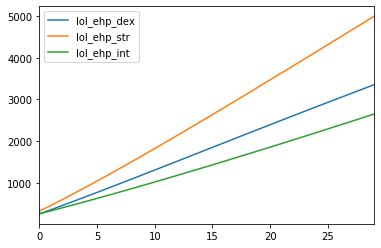

In [13]:
compare(all_cl_df, ['lol_ehp',]).plot()

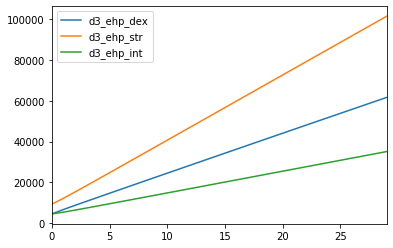

In [14]:
compare(all_cl_df, ['d3_ehp',]).plot()

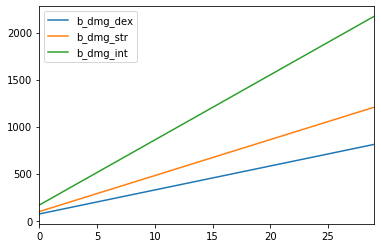

In [15]:
compare(all_cl_df, ['b_dmg',]).plot()

In [16]:
cl_df_l_copy = cl_df_list.copy()

In [17]:
cl_df_l_copy[2][['dex', 'm_dmg', 'd_dmg']]

,dex,m_dmg,d_dmg
0,1,167.00,60.69
1,1,236.19,70.81
2,1,305.37,80.94
3,1,374.56,91.06
4,1,443.75,101.19
5,1,512.94,111.31
6,1,582.13,121.44
7,1,651.31,131.56
8,1,720.50,141.69
9,1,789.69,151.81
